<a href="https://colab.research.google.com/github/SteevAbrahamThomas/new-test/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extraction

In [ ]:
import tarfile

file = "cifar-100-python.tar.gz"
if file.endswith("tar.gz"):
    tar = tarfile.open(file, "r:gz")
    tar.extractall()
    tar.close()

/tmp/ipython-input-928945479.py:6: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


Loading

In [ ]:
import pickle
import numpy as np

def load_cifar100_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


train_data = load_cifar100_batch("cifar-100-python/train")
test_data  = load_cifar100_batch("cifar-100-python/test")
meta_data  = load_cifar100_batch("cifar-100-python/meta")


X_train = train_data[b'data']
y_train = train_data[b'fine_labels']

X_test  = test_data[b'data']
y_test  = test_data[b'fine_labels']


X_train = X_train.reshape(-1, 3, 32, 32).transpose(0,2,3,1)
X_test  = X_test.reshape(-1, 3, 32, 32).transpose(0,2,3,1)


Normalize

In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 100)
y_test  = to_categorical(y_test, 100)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


CNN

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_custom_cnn.h5", save_best_only=True, monitor='val_accuracy')


In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stop, checkpoint])


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0294 - loss: 4.6015

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.0294 - loss: 4.6013 - val_accuracy: 0.0650 - val_loss: 4.3235
Epoch 2/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0663 - loss: 4.1114

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.0663 - loss: 4.1110 - val_accuracy: 0.1225 - val_loss: 3.8101
Epoch 3/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0996 - loss: 3.8536

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0996 - loss: 3.8535 - val_accuracy: 0.1559 - val_loss: 3.5614
Epoch 4/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1335 - loss: 3.6440

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1336 - loss: 3.6437 - val_accuracy: 0.2115 - val_loss: 3.2818
Epoch 5/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1621 - loss: 3.4723

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1621 - loss: 3.4721 - val_accuracy: 0.2557 - val_loss: 3.0481
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1920 - loss: 3.2980

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1920 - loss: 3.2980 - val_accuracy: 0.2792 - val_loss: 2.9944
Epoch 7/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2236 - loss: 3.1512

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2236 - loss: 3.1509 - val_accuracy: 0.3296 - val_loss: 2.6876
Epoch 8/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2518 - loss: 2.9965

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2518 - loss: 2.9964 - val_accuracy: 0.3489 - val_loss: 2.6030
Epoch 9/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2744 - loss: 2.8780

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2744 - loss: 2.8779 - val_accuracy: 0.3572 - val_loss: 2.5725
Epoch 10/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2954 - loss: 2.7690

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2954 - loss: 2.7689 - val_accuracy: 0.3879 - val_loss: 2.4056
Epoch 11/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3220 - loss: 2.6480

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3220 - loss: 2.6480 - val_accuracy: 0.3883 - val_loss: 2.4136
Epoch 12/50
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3423 - loss: 2.5483

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3423 - loss: 2.5484 - val_accuracy: 0.4026 - val_loss: 2.3059
Epoch 13/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3579 - loss: 2.4684 - val_accuracy: 0.4013 - val_loss: 2.3645
Epoch 14/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3738 - loss: 2.3866

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3738 - loss: 2.3867 - val_accuracy: 0.4178 - val_loss: 2.3125
Epoch 15/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3892 - loss: 2.3160

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3891 - loss: 2.3160 - val_accuracy: 0.4285 - val_loss: 2.2308
Epoch 16/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3959 - loss: 2.2748 - val_accuracy: 0.4265 - val_loss: 2.2785
Epoch 17/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4144 - loss: 2.2002

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4144 - loss: 2.2004 - val_accuracy: 0.4442 - val_loss: 2.1369
Epoch 18/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4214 - loss: 2.1550 - val_accuracy: 0.4427 - val_loss: 2.1501
Epoch 19/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4305 - loss: 2.1393

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4305 - loss: 2.1393 - val_accuracy: 0.4453 - val_loss: 2.1624
Epoch 20/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4393 - loss: 2.0834

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4393 - loss: 2.0835 - val_accuracy: 0.4709 - val_loss: 2.0177
Epoch 21/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4447 - loss: 2.0394 - val_accuracy: 0.4618 - val_loss: 2.0892
Epoch 22/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4517 - loss: 2.0149 - val_accuracy: 0.4459 - val_loss: 2.1651
Epoch 23/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4602 - loss: 1.9887 - val_accuracy: 0.4053 - val_loss: 2.3282
Epoch 24/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4640 - loss: 1.9641 - val_accuracy: 0.4668 - val_loss: 2.0302
Epoch 25/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4706 - loss: 1.9374

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4706 - loss: 1.9375 - val_accuracy: 0.4808 - val_loss: 1.9980
Epoch 26/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4750 - loss: 1.9132

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4750 - loss: 1.9133 - val_accuracy: 0.4954 - val_loss: 1.9085
Epoch 27/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4772 - loss: 1.9046 - val_accuracy: 0.4631 - val_loss: 2.0826
Epoch 28/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4861 - loss: 1.8781 - val_accuracy: 0.4573 - val_loss: 2.1024
Epoch 29/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4861 - loss: 1.8560

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4861 - loss: 1.8562 - val_accuracy: 0.5076 - val_loss: 1.8548
Epoch 30/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4959 - loss: 1.8284 - val_accuracy: 0.4809 - val_loss: 1.9936
Epoch 31/50
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4941 - loss: 1.8251

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4941 - loss: 1.8253 - val_accuracy: 0.5091 - val_loss: 1.8653
Epoch 32/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5075 - loss: 1.7878

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5074 - loss: 1.7879 - val_accuracy: 0.5094 - val_loss: 1.9013
Epoch 33/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5033 - loss: 1.7849 - val_accuracy: 0.5094 - val_loss: 1.8815
Epoch 34/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5119 - loss: 1.7525 - val_accuracy: 0.5086 - val_loss: 1.8755


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Custom CNN Test Accuracy: {test_acc:.4f}")


313/313 - 1s - 4ms/step - accuracy: 0.5076 - loss: 1.8548
Custom CNN Test Accuracy: 0.5076


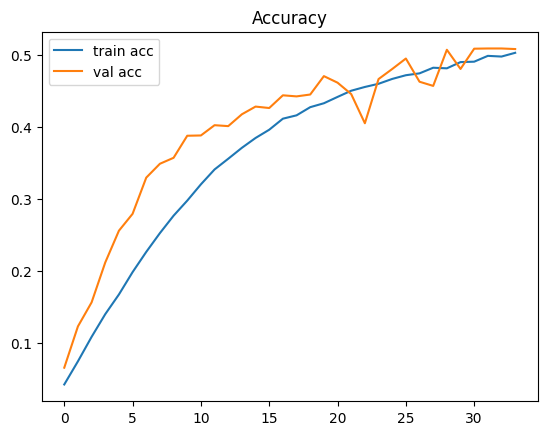

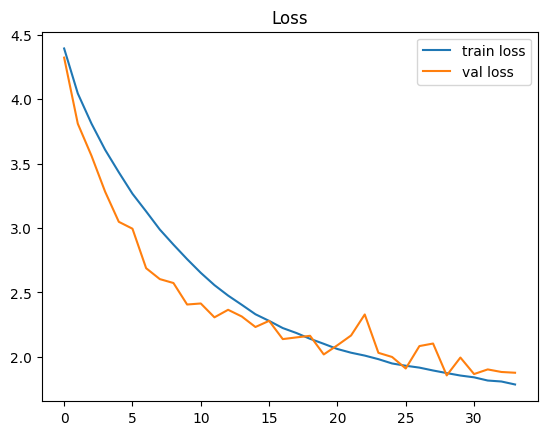

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy")
plt.show()

# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss")
plt.show()


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D


Load

In [ ]:

base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(32,32,3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model_vgg = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])


In [ ]:
model_vgg.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [ ]:
history_vgg = model_vgg.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            epochs=30,
                            batch_size=64,
                            callbacks=[early_stop, checkpoint])


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 75ms/step - accuracy: 0.0097 - loss: 4.6270 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.0091 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.0090 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.0099 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 61ms/step - accuracy: 0.0087 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.0080 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.0095 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.0092 - loss: 4.6054 - 

In [ ]:
test_loss_vgg, test_acc_vgg = model_vgg.evaluate(X_test, y_test, verbose=2)
print(f"VGG16 Test Accuracy: {test_acc_vgg:.4f}")


313/313 - 4s - 12ms/step - accuracy: 0.0100 - loss: 4.6052
VGG16 Test Accuracy: 0.0100


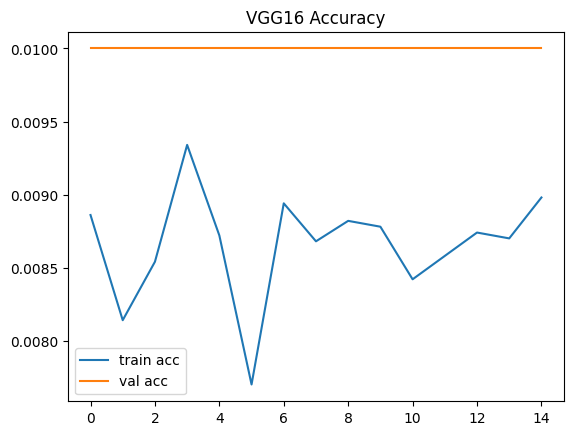

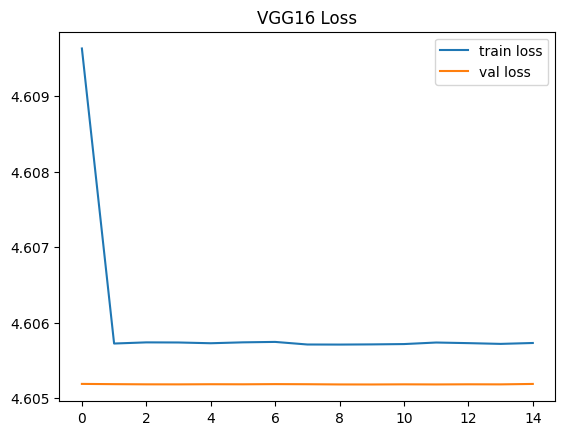

In [ ]:
plt.plot(history_vgg.history['accuracy'], label='train acc')
plt.plot(history_vgg.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("VGG16 Accuracy")
plt.show()

plt.plot(history_vgg.history['loss'], label='train loss')
plt.plot(history_vgg.history['val_loss'], label='val loss')
plt.legend()
plt.title("VGG16 Loss")
plt.show()


In [ ]:
import pandas as pd

results = {
    "Model": ["Custom CNN", "VGG16"],
    "Test Accuracy": [test_acc, test_acc_vgg]
}

results_df = pd.DataFrame(results)
print(results_df)


        Model  Test Accuracy
0  Custom CNN         0.5076
1       VGG16         0.0100


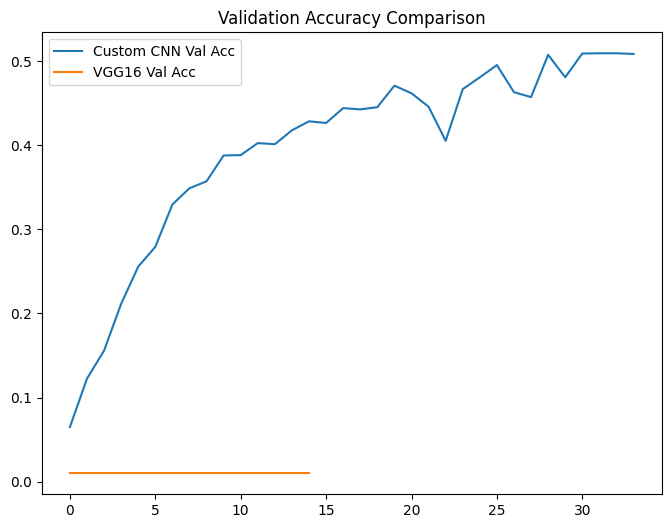

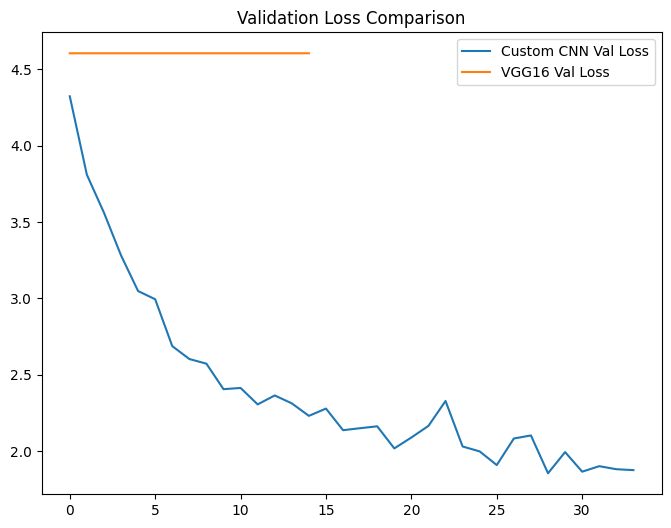

In [ ]:

plt.figure(figsize=(8,6))
plt.plot(history.history['val_accuracy'], label='Custom CNN Val Acc')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16 Val Acc')
plt.legend()
plt.title("Validation Accuracy Comparison")
plt.show()


plt.figure(figsize=(8,6))
plt.plot(history.history['val_loss'], label='Custom CNN Val Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG16 Val Loss')
plt.legend()
plt.title("Validation Loss Comparison")
plt.show()


In [ ]:
print("Custom CNN Summary:")
model.summary()

print("\nVGG16 Model Summary:")
model_vgg.summary()


Custom CNN Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,932,270 (7.37 MB)

 Trainable params: 643,940 (2.46 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,287,882 (4.91 MB)


VGG16 Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,615,150 (170.19 MB)

 Trainable params: 14,871,716 (56.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,743,434 (113.46 MB)

Custom VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

num_classes = 100
input_shape = (32, 32, 3)

def build_vgg16_cifar(input_shape=(32,32,3), num_classes=100):
    model = Sequential(name="VGG16_custom")

    model.add(Conv2D(64, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal', input_shape=input_shape))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))


    model.add(Conv2D(128, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))


    model.add(Conv2D(256, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))


    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))


    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

vgg16_custom = build_vgg16_cifar(input_shape, num_classes)
vgg16_custom.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
ckpt = ModelCheckpoint("best_vgg16_custom.h5", monitor='val_accuracy', save_best_only=True)

history_vgg_custom = vgg16_custom.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, ckpt],
    verbose=1
)

test_loss_vggc, test_acc_vggc = vgg16_custom.evaluate(X_test, y_test, verbose=0)
print(f"VGG16 (custom-built) Test Accuracy: {test_acc_vggc:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0085 - loss: 4.6240

782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 75ms/step - accuracy: 0.0085 - loss: 4.6240 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.0093 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.0091 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.0107 - loss: 4.6054 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.0094 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.0103 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.0092 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
VGG16 (custom-built) Test Accuracy: 0.0100


In [ ]:
test_loss_vggc, test_acc_vggc = vgg16_custom.evaluate(X_test, y_test, verbose=2)
print(f"Custom VGG16 Test Accuracy: {test_acc_vggc:.4f}")


313/313 - 2s - 8ms/step - accuracy: 0.0100 - loss: 4.6052
Custom VGG16 Test Accuracy: 0.0100


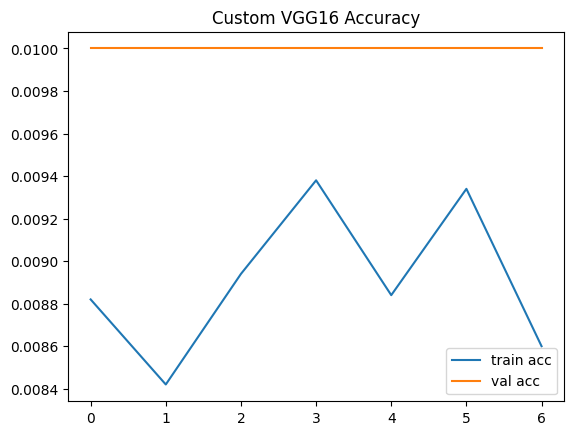

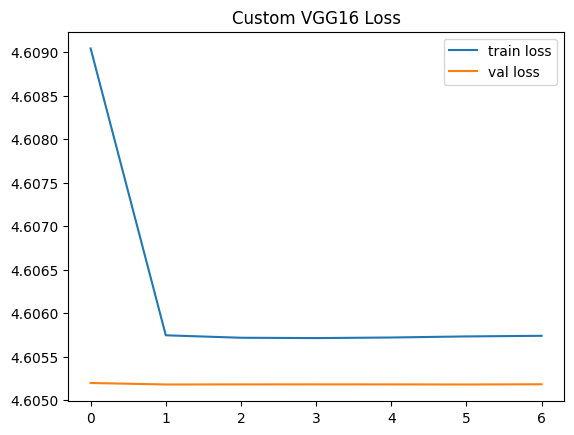

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history_vgg_custom.history['accuracy'], label='train acc')
plt.plot(history_vgg_custom.history['val_accuracy'], label='val acc')
plt.title("Custom VGG16 Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.plot(history_vgg_custom.history['loss'], label='train loss')
plt.plot(history_vgg_custom.history['val_loss'], label='val loss')
plt.title("Custom VGG16 Loss")
plt.legend()
plt.show()


In [ ]:
import pandas as pd

results = {
    "Model": ["Custom CNN", "VGG16 (Pretrained)", "VGG16 (Custom Built)"],
    "Test Accuracy": [test_acc, test_acc_vgg, test_acc_vggc]
}

results_df = pd.DataFrame(results)
print(results_df)


                  Model  Test Accuracy
0            Custom CNN         0.5076
1    VGG16 (Pretrained)         0.0100
2  VGG16 (Custom Built)         0.0100


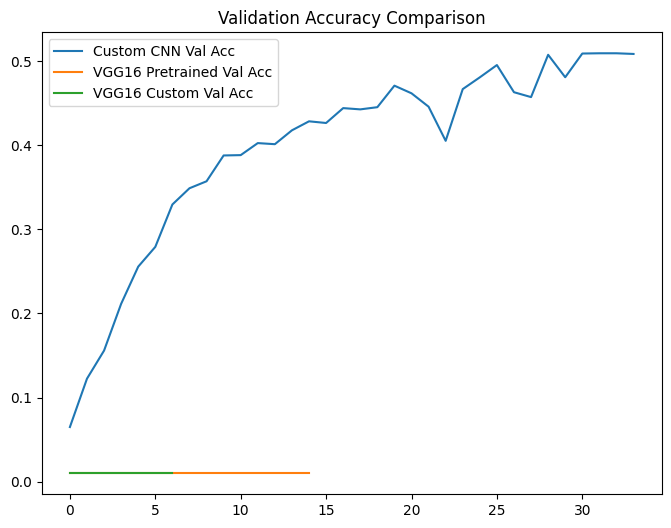

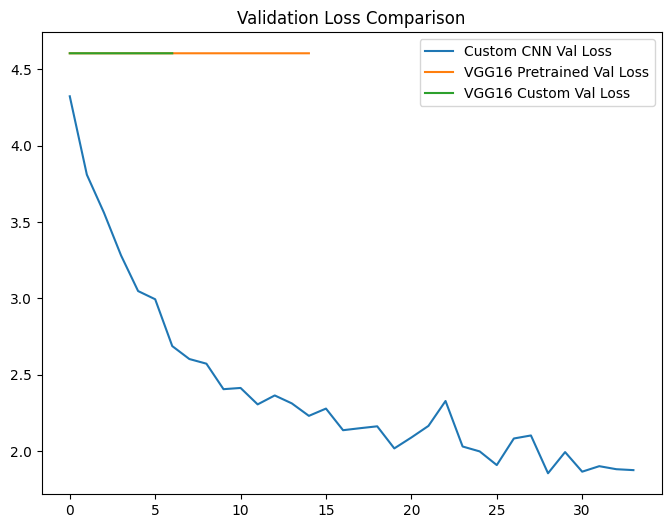

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(history.history['val_accuracy'], label='Custom CNN Val Acc')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16 Pretrained Val Acc')
plt.plot(history_vgg_custom.history['val_accuracy'], label='VGG16 Custom Val Acc')
plt.legend()
plt.title("Validation Accuracy Comparison")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['val_loss'], label='Custom CNN Val Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG16 Pretrained Val Loss')
plt.plot(history_vgg_custom.history['val_loss'], label='VGG16 Custom Val Loss')
plt.legend()
plt.title("Validation Loss Comparison")
plt.show()
